In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from plotting_utils import save_figure
from dimensionality_reduction import pca_reduction, tsne_reduction, umap_reduction
from k_means_clusters import cluster_and_visualize, cluster_from_file
import pickle
from bert_transformer import generate_minilm_embeddings
from wordcloud import WordCloud

In [2]:
# read processed_data_all_labeled.csv from data folder without long path not being in the root
df = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/data/processed_data_all_vol_2.csv')

### BERT embeddings

In [3]:
# embeddings_matrix = generate_minilm_embeddings(df, 'description')

In [4]:
save_path = './bert_embedding_vol_2_improved.pkl'

In [5]:
# # Save the computed embeddings to a file
# with open(save_path, 'wb') as f:
#        pickle.dump(embeddings_matrix, f)
#        print(f"Embeddings saved to {save_path}")

In [6]:
# Open and load the embeddings from the file
try:
    with open(save_path, 'rb') as f:
        embeddings_martix = pickle.load(f)
        print(f"Embeddings loaded from {save_path}")
except FileNotFoundError:
    print(f"File not found: {save_path}")

Embeddings loaded from ./bert_embedding_vol_2_improved.pkl


In [7]:
embeddings_martix.shape

(34131, 384)

## Reduction and Clustering

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

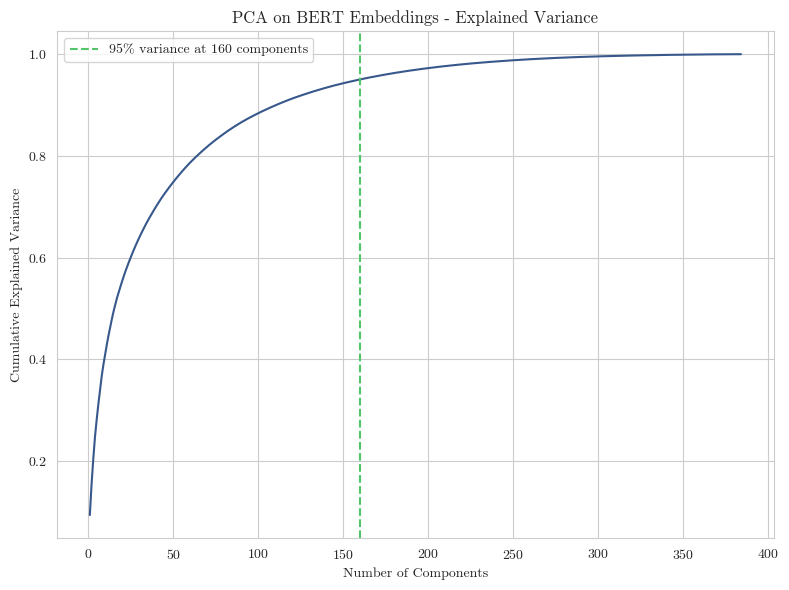

In [8]:
X_pca = pca_reduction(embeddings_martix, 'BERT')

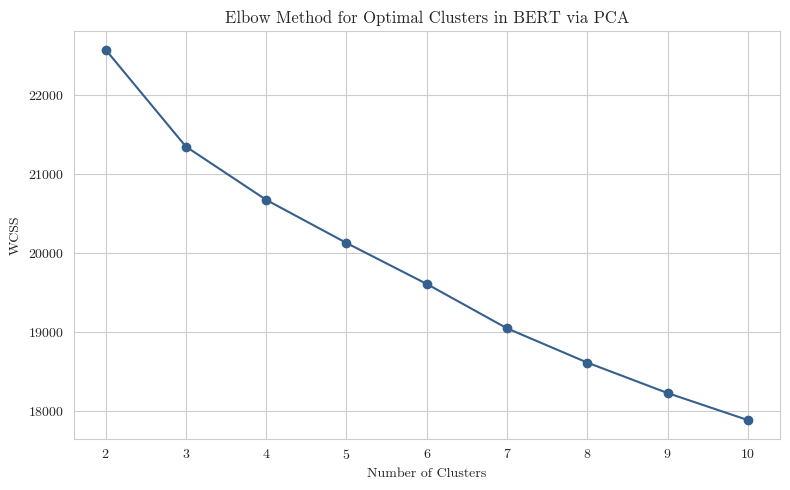

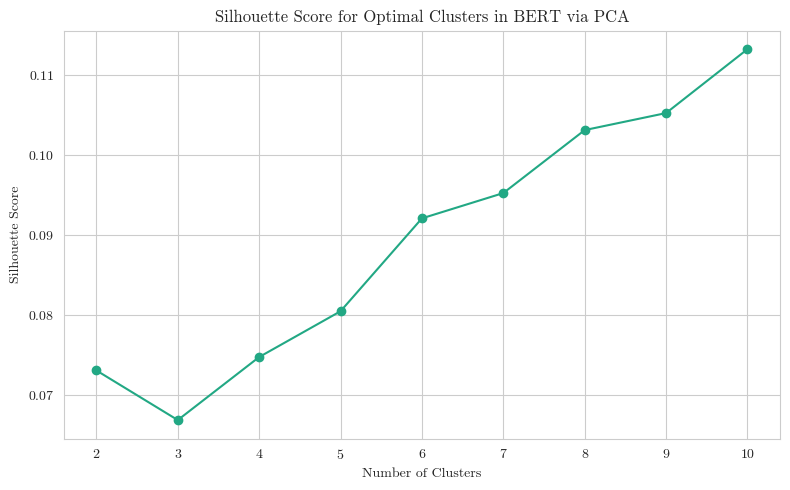

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

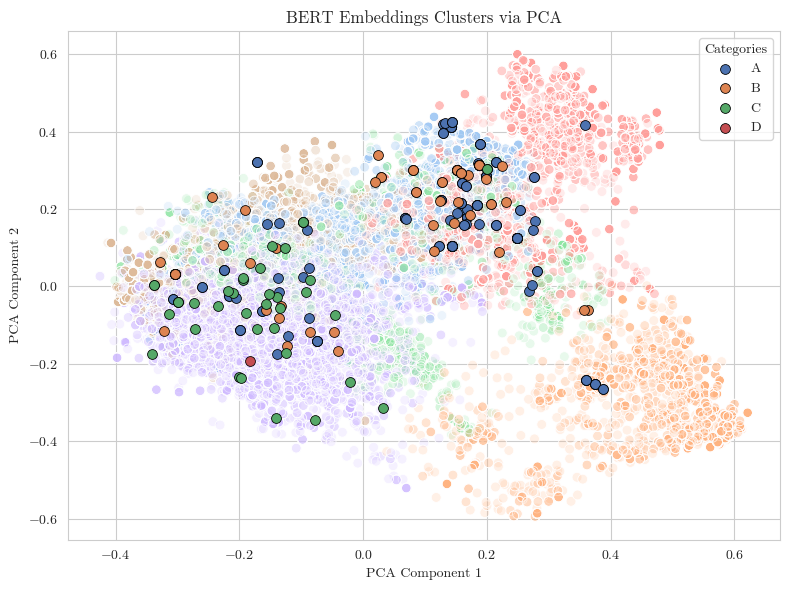

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,BERT_PCA_Cluster_Labels,BERT_PCA_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",4,0.810184
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",4,0.810565
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",4,0.810260
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",4,0.810405
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",4,0.810203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,4,0.900463
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",4,0.836274
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,4,0.898326
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,4,0.909398


In [9]:
cluster_and_visualize(X_pca, df, reduction_method_name="PCA", feature_type="BERT")

### t-SNE

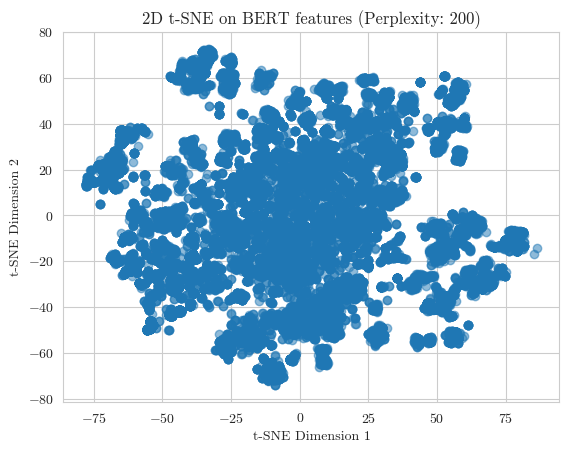

In [10]:
X_tsne = tsne_reduction(embeddings_martix, 'BERT', perplexity=200, metric='cosine')

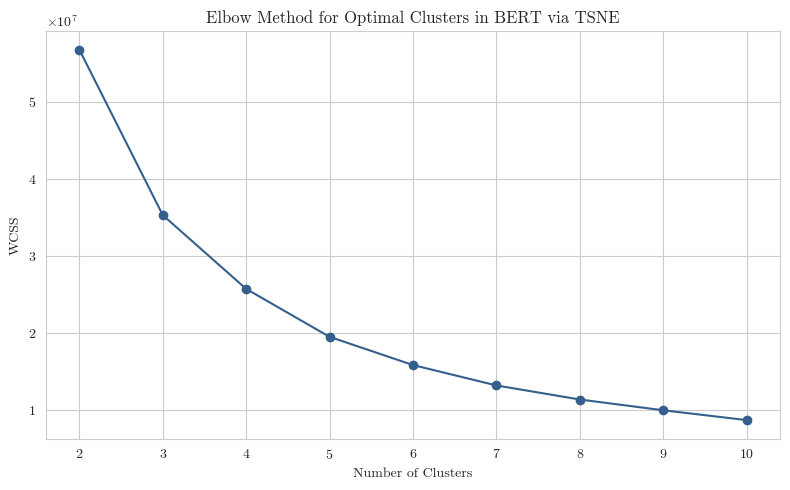

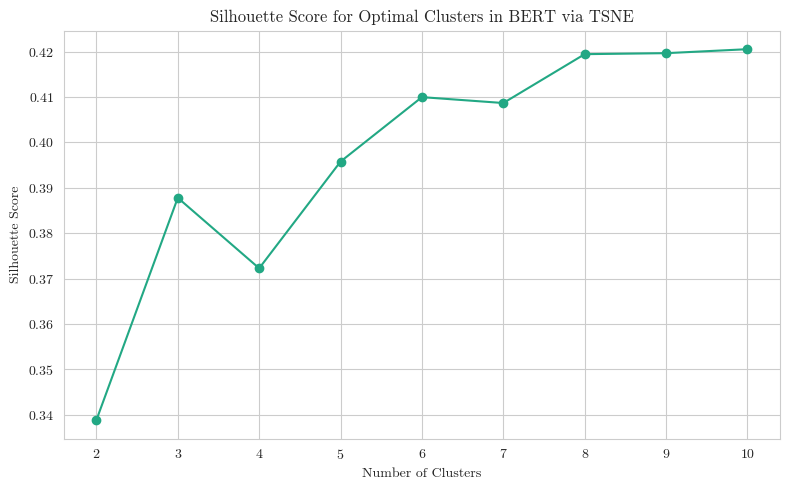

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

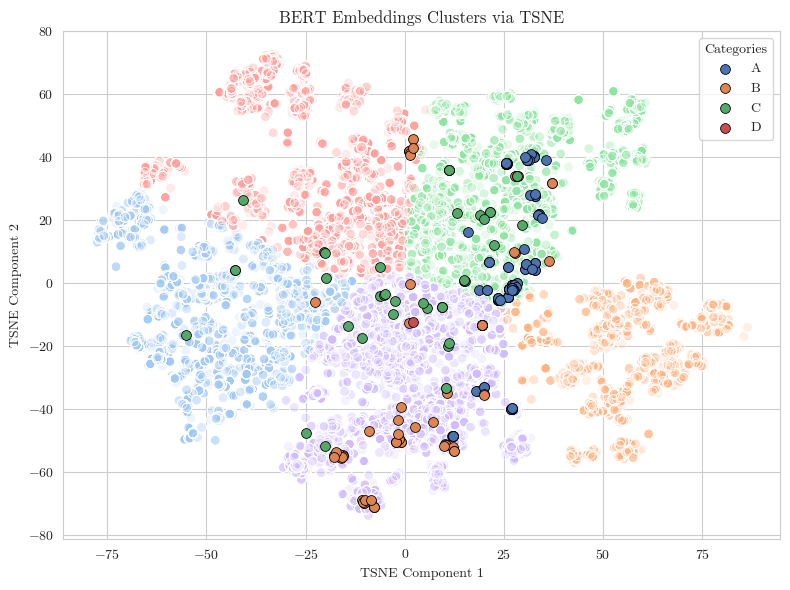

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,BERT_PCA_Cluster_Labels,BERT_PCA_Distance_to_Centroid,BERT_TSNE_Cluster_Labels,BERT_TSNE_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",4,0.810184,4,29.528336
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",4,0.810565,4,29.528366
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",4,0.810260,4,29.528336
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",4,0.810405,4,29.528336
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",4,0.810203,4,29.528366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,4,0.900463,4,15.905109
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",4,0.836274,0,23.487913
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,4,0.898326,0,10.612349
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,4,0.909398,4,35.646824


In [11]:
cluster_and_visualize(X_tsne, df, reduction_method_name="TSNE", feature_type="BERT")

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


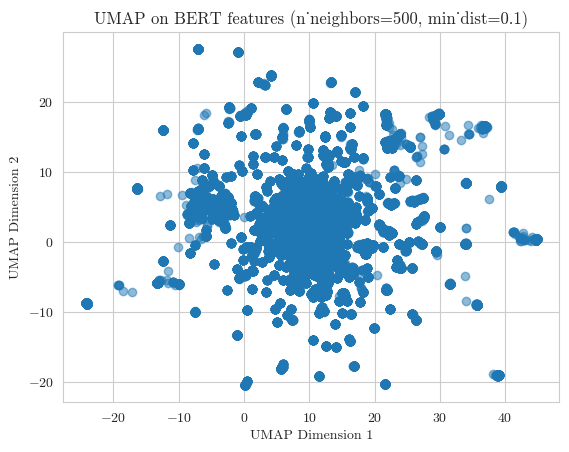

In [16]:
X_umap = umap_reduction(embeddings_martix, n_neighbors=500, min_dist=0.1, feature_type='BERT', metric='cosine')

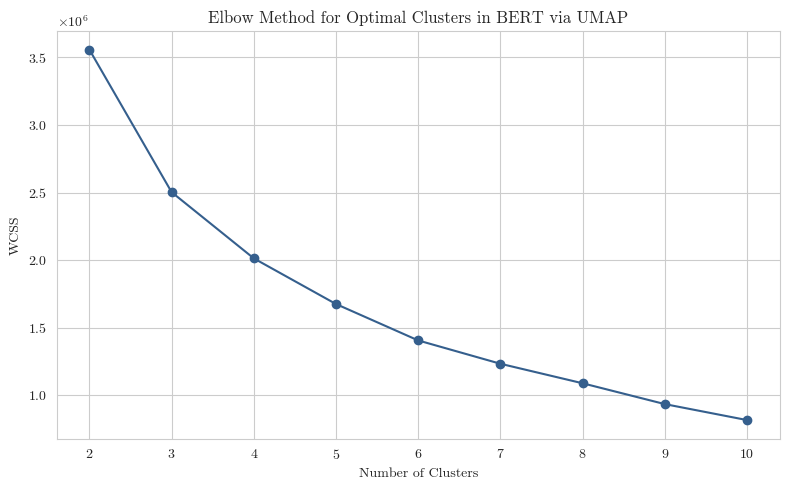

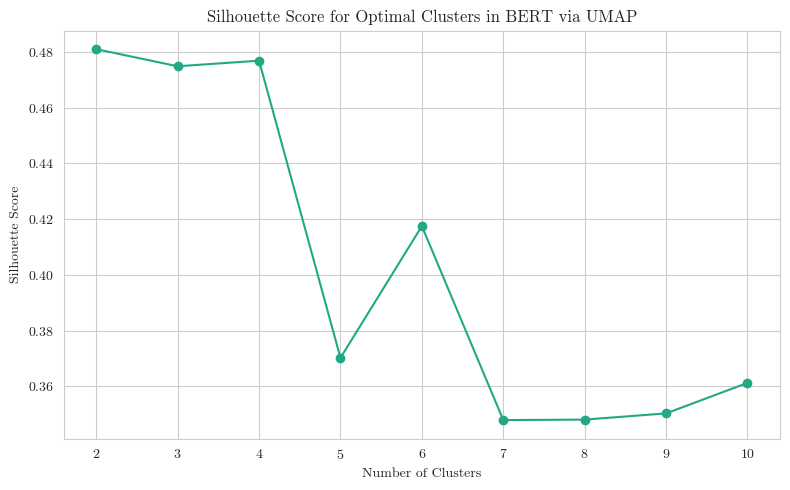

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

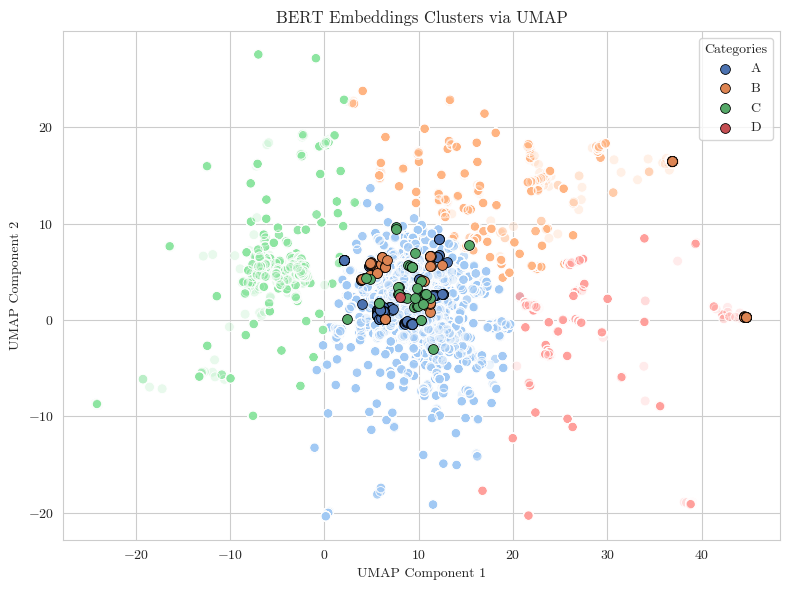

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,...,customer_id_count,category,unit_price_mean,description_original,BERT_PCA_Cluster_Labels,BERT_PCA_Distance_to_Centroid,BERT_TSNE_Cluster_Labels,BERT_TSNE_Distance_to_Centroid,BERT_UMAP_Cluster_Labels,BERT_UMAP_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,...,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",4,0.810184,4,29.528336,0,2.414615
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,...,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",4,0.810565,4,29.528366,0,2.416110
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,...,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",4,0.810260,4,29.528336,0,2.410897
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,...,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",4,0.810405,4,29.528336,0,2.425580
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,...,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",4,0.810203,4,29.528366,0,2.425437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34126,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,...,23,-1,24.6568,SLIDE BEARING ...,4,0.900463,4,15.905109,0,2.507972
34127,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,...,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",4,0.836274,0,23.487913,0,3.616590
34128,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,...,18,-1,11.5649,BOTTOM LINER ...,4,0.898326,0,10.612349,0,0.937049
34129,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,...,6,-1,198.9262,STEM ...,4,0.909398,4,35.646824,0,1.521542


In [17]:
cluster_and_visualize(X_umap, df, "UMAP", "BERT")

In [ ]:
# df.to_csv('/Users/annabzinkowska/DTU/master_thesis/data/df_BERT_clusters_vol_2.csv', index=False)

## Other

In [ ]:
# # plot word cloud 
# text = ' '.join(df['description'])
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
# plt.figure(figsize=(9,9), dpi=600)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()
# wordcloud.to_file("wordcloud_all_vol_2.png")

In [ ]:
# # plot word cloud 
# text = ' '.join(df['description_original'])
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white', include_numbers=True).generate(text)
# plt.figure(figsize=(9,9), dpi=600)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()
# wordcloud.to_file("wordcloud_before_all_vol_2.png")